In [1]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil
import matplotlib as mpl, matplotlib.pyplot as plt

In [2]:
MNIST_URL = "https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz"
path_data = Path('data')
path_data.mkdir(exist_ok=True)
path_gz = path_data / "mnist.pkl.gz"

from urllib.request import urlretrieve
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

!ls -l data

total 16660
drwxr-xr-x 2 james james     4096 Jun 10 21:29 data
-rw-r--r-- 1 james james 17051982 Jun 10 02:50 mnist.pkl.gz


In [3]:
with gzip.open(path_gz, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

In [4]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [5]:
def chunks(x, size):
    for i in range(0, len(x), size): # start, end, stride
        yield x[i:i+size]
        
list(chunks(vals, 5))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

In [6]:
from itertools import islice
it = iter(lst1)
# [] in second arg of iter() is the sentinel
img = list(iter(lambda: list(islice(it, 28)), []))

In [7]:
img

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
 

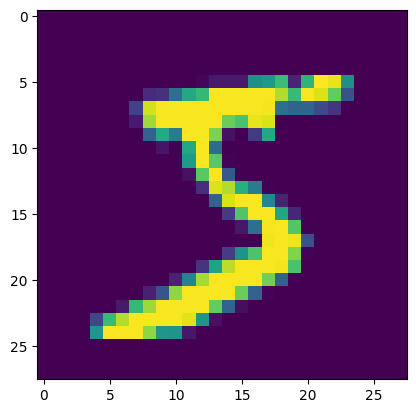

In [8]:
plt.imshow(img)

In [9]:
class Matrix:
    def __init__(self, xs): self.xs = xs
    def __getitem__(self, idxs): return self.xs[idxs[0]][idxs[1]]

In [10]:
m = Matrix(img)
m[20,15]

0.98828125

In [11]:
import torch
from torch import tensor

x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))
x_train.shape

torch.Size([50000, 784])

In [12]:
imgs = x_train.reshape((-1,28,28)) # why -1 for first elem of tuple?
imgs.shape

torch.Size([50000, 28, 28])

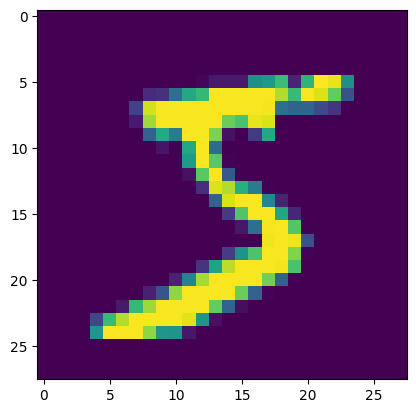

In [13]:
plt.imshow(imgs[0])

In [14]:
imgs[0,20,15]

tensor(0.9883)

In [15]:
n,c = x_train.shape
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [16]:
min(y_train), max(y_train) # the targets

(tensor(0), tensor(9))

In [17]:
import torch

torch.manual_seed(1)
weights = torch.randn(784,10)
bias = torch.zeros(10)

m1 = x_valid[:5]
m2 = weights

m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [18]:
ar, ac = m1.shape # ar is a rows, ac is a columns
br, bc = m2.shape

(ar, ac), (br, bc)

((5, 784), (784, 10))

In [19]:
t1 = torch.zeros(ar, bc)
t1.shape

torch.Size([5, 10])

In [20]:
for i in range(ar):  # one at a time in the result row
    for j in range(bc):  # one at a time in the result's column
        for k in range(ac):  # ac/br are the same, so align them
            t1[i,j] += m1[i,k] * m2[k,j]  # and sum the products of each

In [21]:
t1

tensor([[-10.9417,  -0.6844,  -7.0038,  -4.0066,  -2.0857,  -3.3588,   3.9127,
          -3.4375, -11.4696,  -2.1153],
        [ 14.5430,   5.9977,   2.8914,  -4.0777,   6.5914, -14.7383,  -9.2787,
           2.1577, -15.2772,  -2.6758],
        [  2.2204,  -3.2171,  -4.7988,  -6.0453,  14.1661,  -8.9824,  -4.7922,
          -5.4446, -20.6758,  13.5657],
        [ -6.7097,   8.8998,  -7.4611,  -7.8966,   2.6994,  -4.7260, -11.0278,
         -12.9776,  -6.4443,   3.6376],
        [ -2.4444,  -6.4034,  -2.3984,  -9.0371,  11.1772,  -5.7724,  -8.9214,
          -3.7862,  -8.9827,   5.2797]])

In [22]:
t1.shape

torch.Size([5, 10])

In [23]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
t1

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [24]:
def matmul(a,b):
    (ar, ac), (br, bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i,j] += a[i,k] * b[k,j]
    return c

In [25]:
%time _ = matmul(m1, m2)

CPU times: user 675 ms, sys: 562 µs, total: 675 ms
Wall time: 673 ms


In [26]:
ar*bc*ac

39200

In [27]:
from numba import njit
from numpy import array

@njit
def dot(a,b):
    res = 0.
    for i in range(len(a)): res += a[i]*b[i]
    return res

%time dot(array([1., 2, 3]), array([2., 3, 4]))

CPU times: user 576 ms, sys: 501 ms, total: 1.08 s
Wall time: 373 ms


20.0

In [34]:
def matmul(a,b):
    (ar, ac), (br, bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = dot(a[i,:], b[:,j])
    return c

In [35]:
m1a, m2a = m1.numpy(), m2.numpy()
m1a.shape, m2a.shape

((5, 784), (784, 10))

In [36]:
from fastcore.test import *

test_close(t1, matmul(m1a, m2a))

In [ ]:
%tim